In [17]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print("the shape of xtrain is:", xtrain.shape) #image data set len(X), len(y), n,n (n X n)
print("the shape of ytrain is:", ytrain.shape)

the shape of xtrain is: (60000, 28, 28)
the shape of ytrain is: (60000,)


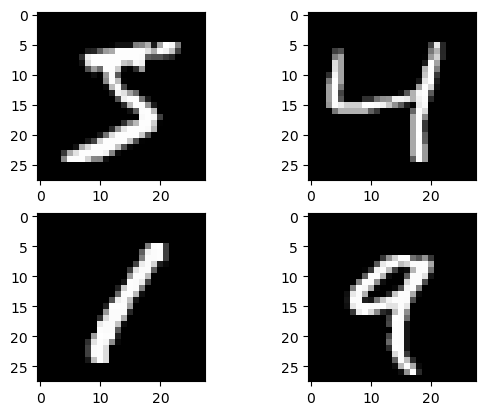

In [19]:
plt.subplot(221)
#table lange = scale of the img data
#plt.title(xtrain)
plt.imshow(xtrain[0], cmap = plt.get_cmap('grey'))
plt.subplot(222)
plt.imshow(xtrain[2], cmap = plt.get_cmap('grey'))
plt.subplot(223)
plt.imshow(xtrain[3], cmap = plt.get_cmap('grey'))
plt.subplot(224)
plt.imshow(xtrain[4], cmap = plt.get_cmap('grey'))
plt.show()
           

In [20]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1]*xtrain.shape[2])
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1]* xtest.shape[2])

xtrain = xtrain/255
xtest = xtest/255

unique_classes = np.unique(ytrain)
num_classes = len(unique_classes)
print(f"Number of classes: {num_classes}")

Number of classes: 10


In [21]:
model = Sequential()
model.add(Dense(128, input_dim = 784, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100, input_dim= 784, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,390 (446.84 KB)

 Trainable params: 114,390 (446.84 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 10, verbose = 1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8414 - loss: 0.5191 - val_accuracy: 0.9607 - val_loss: 0.1302
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9536 - loss: 0.1577 - val_accuracy: 0.9682 - val_loss: 0.1011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9646 - loss: 0.1202 - val_accuracy: 0.9753 - val_loss: 0.0802
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9703 - loss: 0.0981 - val_accuracy: 0.9756 - val_loss: 0.0771
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9718 - loss: 0.0891 - val_accuracy: 0.9733 - val_loss: 0.0886
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9766 - loss: 0.0752 - val_accuracy: 0.9788 - val_loss: 0.0754
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9770 - loss: 0.0720 - val_accuracy: 0.9791 - val_loss: 0.0724
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9795 - loss: 0.0655 - 

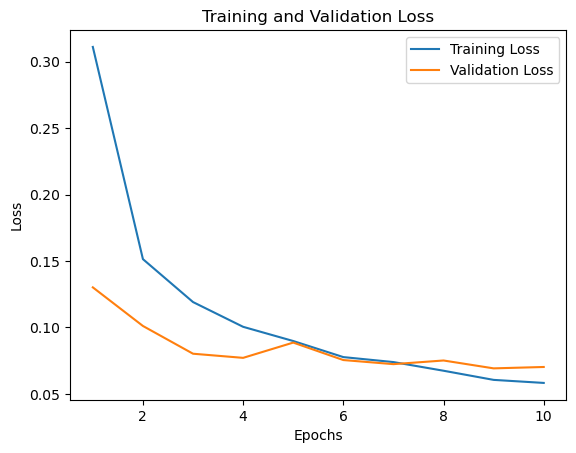

In [25]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
scores = model.evaluate(xtrain,ytrain)
print("Training Accuracy: %.2f%%\n"%(scores[1]*100))
scores = model.evaluate(xtest,ytest)
print("Testing Accuracy: %.2f%%\n"%(scores[1]*100))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9933 - loss: 0.0214
Training Accuracy: 99.30%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0801
Testing Accuracy: 97.98%

